In [1]:
from scripts import Diatom

In [2]:
diatom = Diatom("iLB1027_lipid.xml", "DM")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2760359
Academic license 2760359 - for non-commercial use only - registered to ma___@ug.uchile.cl


'R_AAL(fum)_c' is not a valid SBML 'SId'.
'R_sink_Asn-X-Ser_Thr_c' is not a valid SBML 'SId'.


In [3]:
def polytope_pipeline(reactions: tuple[str, str], n_angles: int = 360, delta: float = 0.01, n_clusters: int = 20):
    diatom.set_objective_functions({reactions[1]: 1.0})
    diatom.analyze.project_polytope_2d(reactions, n_angles = n_angles)
    diatom.grid.sample_polytope(delta = delta)
    diatom.grid.debug_plot(delta = delta)
    diatom.analyze.qualitative_analysis(only_load=False)
    diatom.clustering.set_grid_clusters('hierarchical', k = n_clusters)
    #df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing= True)
    #diatom.clustering.compare_clusters(df, reactions[0], reactions[1]).head(200)
    diatom.plot.plot_sampled_polytope(show_boundary=True)


def analyze_reactions(reaction_list1: list[str], reaction_list2: list[str], n_angles: int = 360, delta: float = 0.0125) -> None:
    for reaction1 in reaction_list1:
        for reaction2 in reaction_list2:
            polytope_pipeline((reaction1, reaction2), n_angles = n_angles, delta = delta)


Maximize
1.0*DM_biomass_c - 1.0*DM_biomass_c_reverse_c49c1


/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


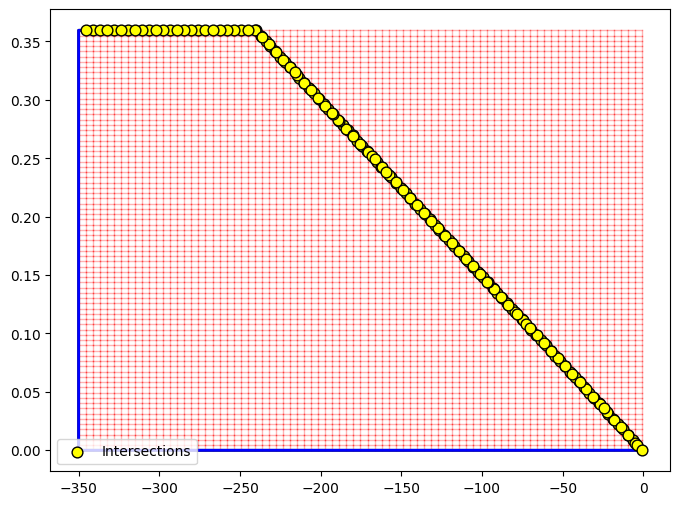

Running qualitative fva over grid feasible points...
No reactions previously selected for FVA and clustering!
Setting reactions for analysis...

Analyzing point feasibility....


 49%|████▉     | 2198/4462 [1:41:43<4:02:36,  6.43s/it]Process ForkPoolWorker-5099:
Traceback (most recent call last):
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/queues.py", line 365, in get
    res = self._reader.recv_bytes()
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/chuckolate/miniconda3/envs/benpy310_linux/lib/python3.10/multiprocessing/connection.py", line 414, in _recv_bytes



Interrupt request received

Interrupt request received

Interrupt request received

Interrupt request received


KeyboardInterrupt: 

In [4]:
#reactions1 = ["EX_co2_e"]
#reactions2 = ["RUBISC_h"]

reactions1 = ["EX_photon_e"]
reactions2 = ["DM_biomass_c"]

diatom.modify_bounds({"EX_photon_e": (-350, 0)})

analyze_reactions(reactions1, reactions2)


In [ ]:
reactions = [
    # EXCHANGE
    "EX_co2_e",
    "EX_o2_e",
    "EX_h2o_e",
    "EX_co_e", 
    "EX_no3_e",
    "EX_photon_e",

    # CHLOROPLAST
    "ATPS_h",
    "ATPM_h",
    "GLNA_h",
    "GLTS_h",
    "ACCOAC_h",
    "ACOATA_h",
    "NTRIR_h",
    "PSII_u",
    "FNOR_h",
    "GDR_NADP_h",
    "RUBISO_h",
    "RUBISC_h", 
    "DXPS_h",
    #"MEHLER_h",

    # MITOCHONDRIA
    "ATPS_m",
    "ATPM_m",
    "GLNA_m",
    "GLTS_m",
    "THD2_m",
    "GLUDH2_m",
    #"AGAS_m",

    # CYTOSOL
    "ATPS_c",
    "TAGAH_HDE_ARA_ARA_c",
    "ACOADAGAT_EPA_EPA_EPA_c",
    "ACOADAGAT_HDE_ARA_ARA_c",
    "NOR_c",
    "PAPA_EPA_EPA_c",
    "NITR_c",
]

df = diatom.clustering.get_grid_cluster_qual_profiles(threshold=0.8, changing=False)


rxn1, rxn2 = diatom.analyze.analyzed_reactions
df = df.loc[reactions]
df.to_csv(f"clusters/{rxn1}_{rxn2}_clusters.csv", index=True, encoding='utf-8')
df

cluster_dfs len: 6


,c1,c2,c3,c4,c5,c6
EX_co2_e,--,--,--,--,-0,-0
EX_o2_e,++,++,++,++,0+,0+
EX_h2o_e,--,--,--,--,-0,-0
EX_co_e,0+,0+,0,0,0+,0
EX_no3_e,-,-,-,-,-,0
EX_photon_e,--,--,--,--,--,--
ATPS_h,++,++,++,++,++,++
ATPM_h,0+,0+,0+,0+,0+,0+
GLNA_h,0+,0+,0+,0+,0+,0+
GLTS_h,0+,0+,0+,0+,0+,0+


Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...
Quantitative Flux Coupling analysis 
 Initializing grid...


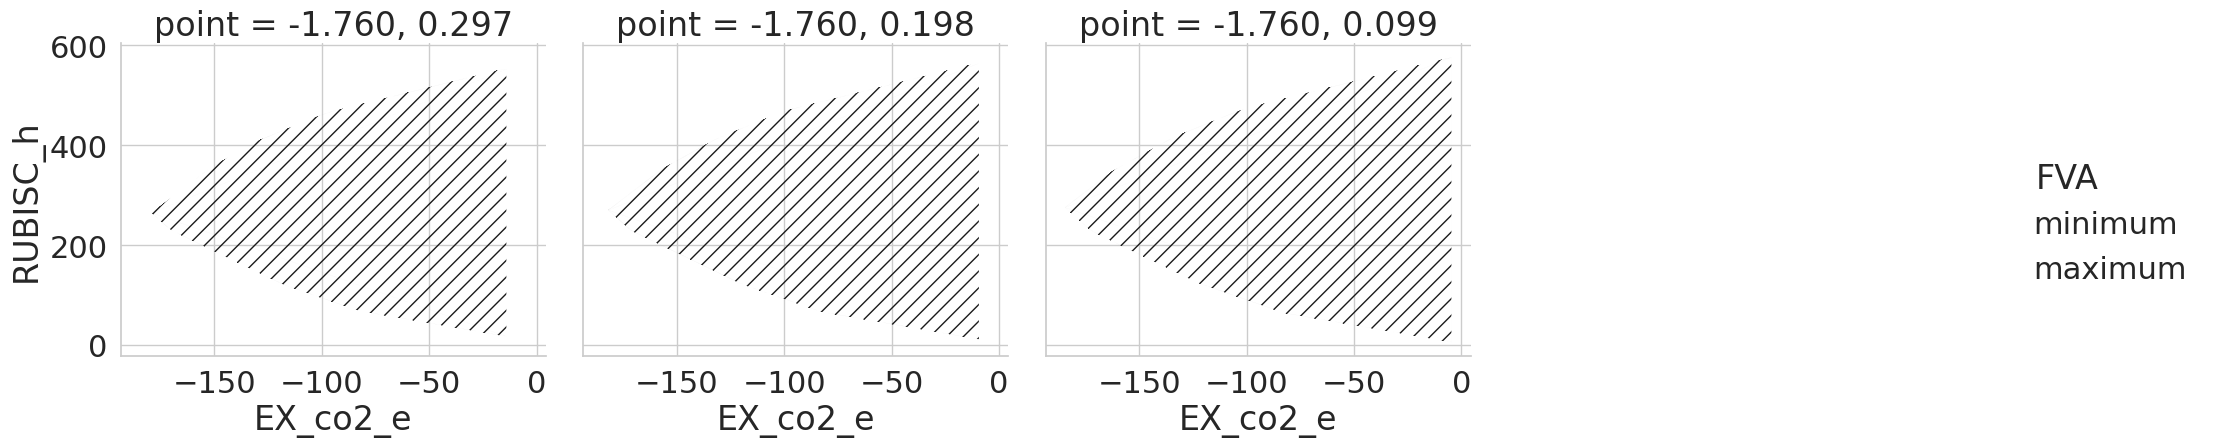

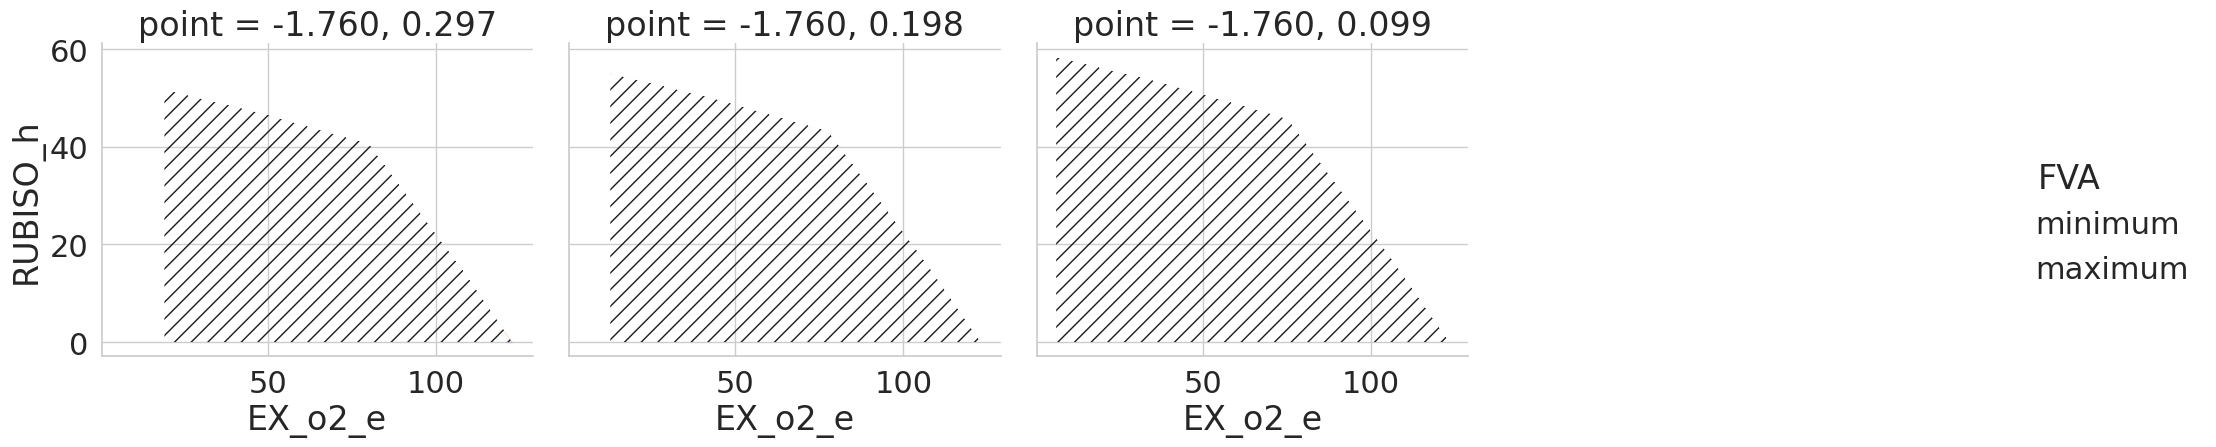

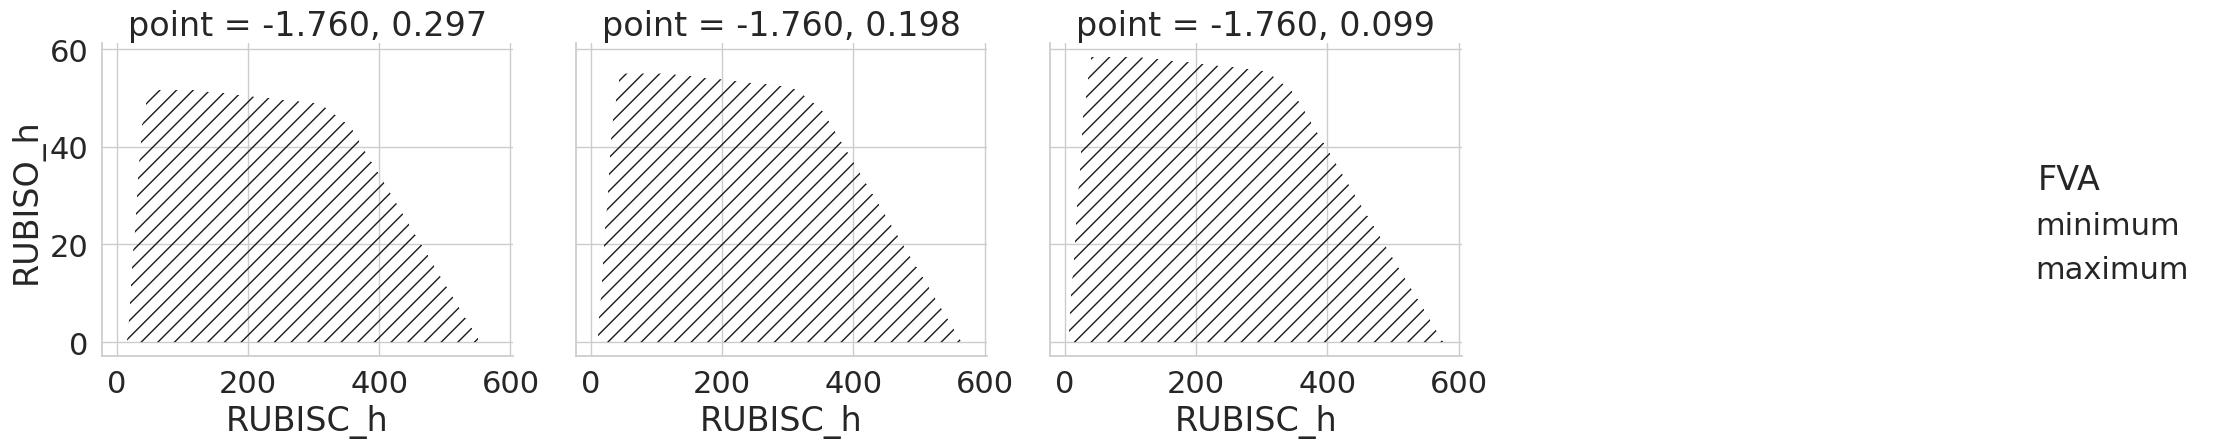

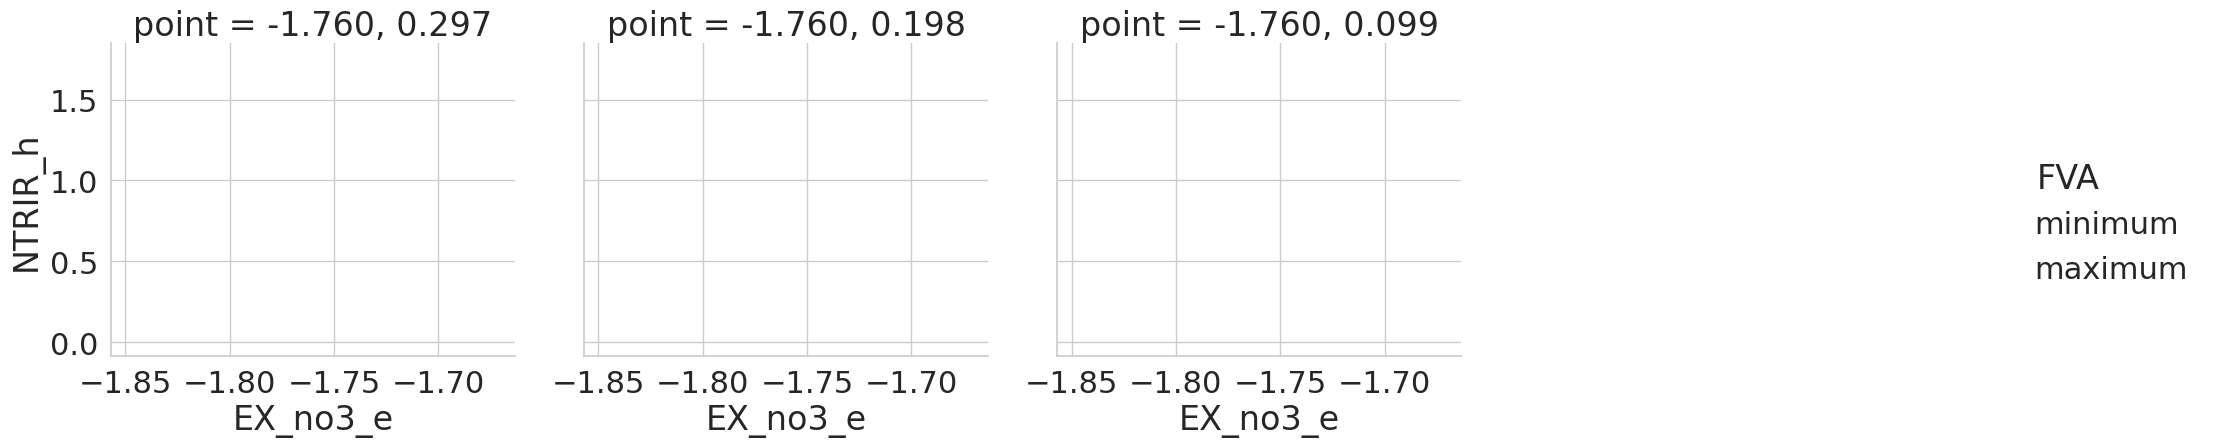

In [ ]:
grid_x = [-50, -100, -150, -175]
grid_y = [0.3, 0.2, 0.1]

reaction_couplings = [
    ('EX_co2_e', 'RUBISC_h'),
    ('EX_o2_e', 'RUBISO_h'),
    ("RUBISC_h", "RUBISO_h"),
    ("EX_no3_e", "NTRIR_h")
]

for coupling in reaction_couplings:
    diatom.analyze.quan_FCA(grid_x, grid_y, coupling)
    diatom.plot.plot_qFCA()